In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# === MacÏö© ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ===
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# === ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú (Mac Í≤ΩÎ°úÎ°ú ÏàòÏ†ï) ===
file_path = "/Users/gimbohyeon1/Desktop/Î≥¥ÌòÑÏßÑÏòÅÌîÑÎ°úÏ†ùÌä∏.xlsx"

# === ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ ===
if not os.path.exists(file_path):
    raise FileNotFoundError(f"ÌååÏùº Í≤ΩÎ°úÍ∞Ä ÏûòÎ™ªÎêòÏóàÍ±∞ÎÇò Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: {file_path}")

# === ÎèºÏßÄ ÌùêÎ¶ÑÎèÑ ÏãúÌä∏ Î∂àÎü¨Ïò§Í∏∞ ===
df = pd.read_excel(file_path, sheet_name="ÎèºÏßÄ ÌùêÎ¶ÑÎèÑ", engine="openpyxl")

# === ÎèºÏßÄ ÌùêÎ¶ÑÎèÑ ÏãúÌä∏ ÏπºÎüºÎ™Ö ÌôïÏù∏ ===
print(df.columns)

Index(['date', 'jy', 'bh'], dtype='object')


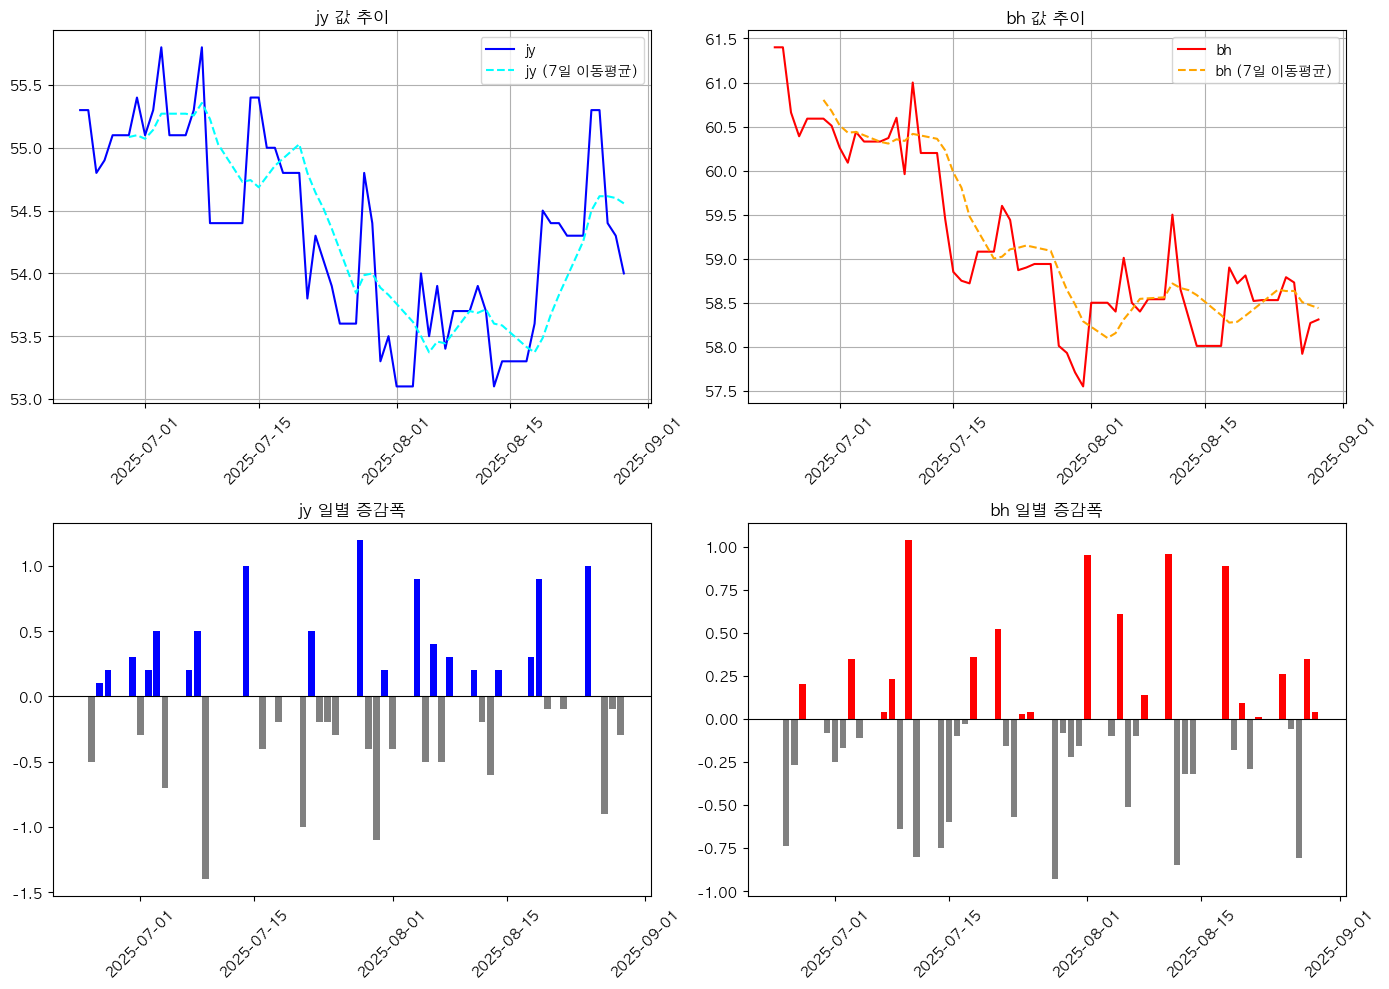

In [39]:

# ÎÇ†ÏßúÌòï Î≥ÄÌôò
df["date"] = pd.to_datetime(df["date"])

# üîç 8Ïõî 29ÏùºÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
cutoff_date = pd.to_datetime("2025-08-29")
df_filtered = df[df["date"] <= cutoff_date].copy()

# Ï†ÑÏùº ÎåÄÎπÑ Ï¶ùÍ∞ê Í≥ÑÏÇ∞
df_filtered["jy_diff"] = df_filtered["jy"].diff()
df_filtered["bh_diff"] = df_filtered["bh"].diff()

# 7Ïùº Ïù¥ÎèôÌèâÍ∑† Í≥ÑÏÇ∞
df_filtered["jy_MA7"] = df_filtered["jy"].rolling(window=7).mean()
df_filtered["bh_MA7"] = df_filtered["bh"].rolling(window=7).mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,10))

# 1. jy ÌùêÎ¶Ñ + Ïù¥ÎèôÌèâÍ∑†
plt.subplot(2,2,1)
plt.plot(df_filtered["date"], df_filtered["jy"], label="jy", color="blue")
plt.plot(df_filtered["date"], df_filtered["jy_MA7"], label="jy (7Ïùº Ïù¥ÎèôÌèâÍ∑†)", color="cyan", linestyle="--")
plt.title("jy Í∞í Ï∂îÏù¥")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 2. bh ÌùêÎ¶Ñ + Ïù¥ÎèôÌèâÍ∑†
plt.subplot(2,2,2)
plt.plot(df_filtered["date"], df_filtered["bh"], label="bh", color="red")
plt.plot(df_filtered["date"], df_filtered["bh_MA7"], label="bh (7Ïùº Ïù¥ÎèôÌèâÍ∑†)", color="orange", linestyle="--")
plt.title("bh Í∞í Ï∂îÏù¥")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 3. jy ÏùºÎ≥Ñ Ï¶ùÍ∞êÌè≠
plt.subplot(2,2,3)
plt.bar(df_filtered["date"], df_filtered["jy_diff"], color=df_filtered["jy_diff"].apply(lambda x: "blue" if x >= 0 else "gray"))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("jy ÏùºÎ≥Ñ Ï¶ùÍ∞êÌè≠")
plt.xticks(rotation=45)

# 4. bh ÏùºÎ≥Ñ Ï¶ùÍ∞êÌè≠
plt.subplot(2,2,4)
plt.bar(df_filtered["date"], df_filtered["bh_diff"], color=df_filtered["bh_diff"].apply(lambda x: "red" if x >= 0 else "gray"))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("bh ÏùºÎ≥Ñ Ï¶ùÍ∞êÌè≠")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

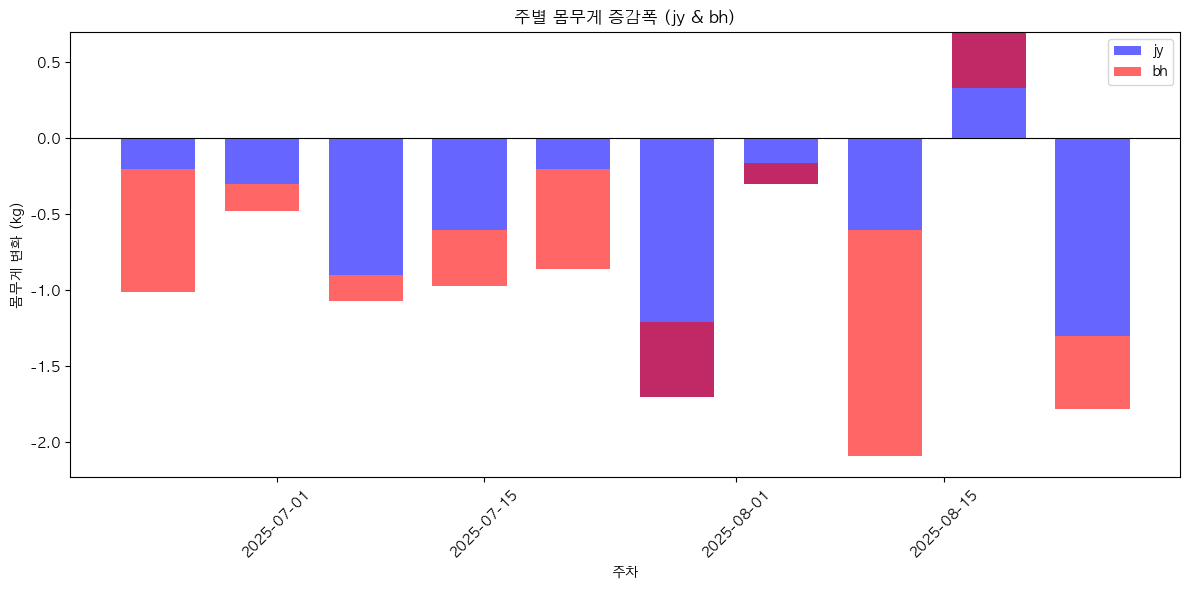

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# ÎÇ†Ïßú Î≥ÄÌôò
df["date"] = pd.to_datetime(df["date"])

# üîç 8Ïõî 29ÏùºÍπåÏßÄ ÌïÑÌÑ∞ÎßÅ
cutoff_date = pd.to_datetime("2025-08-29")
df_filtered = df[df["date"] <= cutoff_date].copy()

# üìÖ Ï£º Îã®ÏúÑÎ°ú Í∑∏Î£πÌôî (ÏõîÏöîÏùº ÏãúÏûë Í∏∞Ï§Ä)
df_filtered["week"] = df_filtered["date"].dt.to_period("W").apply(lambda r: r.start_time)

# üßÆ Ï£ºÎ≥Ñ Ï¶ùÍ∞êÌè≠ Í≥ÑÏÇ∞
weekly_change = df_filtered.groupby("week")[["jy", "bh"]].agg(["first", "last"])
weekly_change.columns = ["jy_first", "jy_last", "bh_first", "bh_last"]
weekly_change["jy_diff"] = weekly_change["jy_last"] - weekly_change["jy_first"]
weekly_change["bh_diff"] = weekly_change["bh_last"] - weekly_change["bh_first"]

# üìà ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))

# jy Ï£ºÎ≥Ñ Ï¶ùÍ∞êÌè≠
plt.bar(weekly_change.index, weekly_change["jy_diff"], width=5, label="jy", color="blue", alpha=0.6)

# bh Ï£ºÎ≥Ñ Ï¶ùÍ∞êÌè≠
plt.bar(weekly_change.index, weekly_change["bh_diff"], width=5, label="bh", color="red", alpha=0.6, bottom=weekly_change["jy_diff"])

plt.axhline(0, color="black", linewidth=0.8)
plt.title("Ï£ºÎ≥Ñ Î™∏Î¨¥Í≤å Ï¶ùÍ∞êÌè≠ (jy & bh)")
plt.xlabel("Ï£ºÏ∞®")
plt.ylabel("Î™∏Î¨¥Í≤å Î≥ÄÌôî (kg)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
